# Import Important Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gc

gc.collect()
sns.set_style("whitegrid")
plt.style.use('ggplot')
pd.set_option("display.precision", 4)

# Ignore Warnings

In [2]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
 
import warnings
warnings.filterwarnings(action='ignore')

# Read Data

In [3]:
Orders = pd.read_excel('RestaurantOrders.xlsx')
Details = pd.read_excel('RestaurantsDetails.xlsx')

In [4]:
Orders.rename(columns={'Payment Mode': 'Payment Method'}, inplace=True)

In [5]:
Orders

,Order ID,Customer Name,RestaurantID,Order Date,Quantity of Items,Order Amount,Payment Method,Delivery Time Taken (mins),Customer Rating-Food,Customer Rating-Delivery
0,OD1,Srini,6,2022-01-01 23:15:00,5,633,Debit Card,47,5,3
1,OD2,Revandh,13,2022-01-01 19:21:00,5,258,Credit Card,41,3,5
2,OD3,David,9,2022-01-01 23:15:00,7,594,Cash on Delivery,30,3,4
3,OD4,Selva,4,2022-01-01 20:31:00,5,868,Cash on Delivery,30,3,4
4,OD5,Vinny,4,2022-01-01 11:10:00,4,170,Debit Card,18,4,3
...,...,...,...,...,...,...,...,...,...,...
495,OD496,Chinny,20,2022-01-01 15:22:00,6,1184,Cash on Delivery,13,4,2
496,OD497,Veronica,17,2022-01-01 13:31:00,5,541,Credit Card,27,4,3
497,OD498,Chinny,10,2022-01-01 21:31:00,6,1049,Cash on Delivery,27,3,4
498,OD499,Charlie,2,2022-01-01 14:10:00,5,758,Cash on Delivery,29,3,3


In [6]:
Details

,RestaurantID,RestaurantName,Cuisine,Zone,Category
0,1,The Cave Hotel,Continental,Zone B,Pro
1,2,SSK Hotel,North Indian,Zone D,Pro
2,3,ASR Restaurant,South Indian,Zone D,Ordinary
3,4,Win Hotel,South Indian,Zone D,Ordinary
4,5,Denver Restaurant,Continental,Zone D,Pro
5,6,Willies,French,Zone D,Pro
6,7,AMN,North Indian,Zone D,Ordinary
7,8,Oslo,French,Zone B,Ordinary
8,9,Excel Restaurant,North Indian,Zone D,Ordinary
9,10,Dave Hotel,South Indian,Zone A,Ordinary


# Select Important Features Only

In [7]:
Orders = Orders[['RestaurantID', 'Quantity of Items', 'Order Amount', 'Payment Method', 'Delivery Time Taken (mins)', 'Customer Rating-Food', 'Customer Rating-Delivery']]

In [8]:
Orders

,RestaurantID,Quantity of Items,Order Amount,Payment Method,Delivery Time Taken (mins),Customer Rating-Food,Customer Rating-Delivery
0,6,5,633,Debit Card,47,5,3
1,13,5,258,Credit Card,41,3,5
2,9,7,594,Cash on Delivery,30,3,4
3,4,5,868,Cash on Delivery,30,3,4
4,4,4,170,Debit Card,18,4,3
...,...,...,...,...,...,...,...
495,20,6,1184,Cash on Delivery,13,4,2
496,17,5,541,Credit Card,27,4,3
497,10,6,1049,Cash on Delivery,27,3,4
498,2,5,758,Cash on Delivery,29,3,3


In [9]:
Details = Details[['RestaurantID', 'RestaurantName', 'Cuisine']]

In [10]:
Details

,RestaurantID,RestaurantName,Cuisine
0,1,The Cave Hotel,Continental
1,2,SSK Hotel,North Indian
2,3,ASR Restaurant,South Indian
3,4,Win Hotel,South Indian
4,5,Denver Restaurant,Continental
5,6,Willies,French
6,7,AMN,North Indian
7,8,Oslo,French
8,9,Excel Restaurant,North Indian
9,10,Dave Hotel,South Indian


# Merge Dataframes Into One Datafram

In [11]:
OrdersDetails = Orders.merge(Details, on='RestaurantID', how='inner')

In [12]:
OrdersDetails.drop('RestaurantID', inplace=True, axis=1)

In [13]:
OrdersDetails

,Quantity of Items,Order Amount,Payment Method,Delivery Time Taken (mins),Customer Rating-Food,Customer Rating-Delivery,RestaurantName,Cuisine
0,5,633,Debit Card,47,5,3,Willies,French
1,5,345,Cash on Delivery,22,4,5,Willies,French
2,7,934,Debit Card,30,2,4,Willies,French
3,5,908,Debit Card,15,3,2,Willies,French
4,4,300,Cash on Delivery,27,2,2,Willies,French
...,...,...,...,...,...,...,...,...
495,4,460,Cash on Delivery,31,4,5,Vrinda Bhavan,North Indian
496,4,450,Debit Card,15,2,4,Vrinda Bhavan,North Indian
497,7,837,Debit Card,50,1,1,Vrinda Bhavan,North Indian
498,5,1169,Debit Card,43,3,5,Vrinda Bhavan,North Indian


# Rating Of Each Restaurant

In [14]:
RestaurantRating= OrdersDetails.groupby(['RestaurantName'], as_index=False, sort=True).agg({'Customer Rating-Delivery': ['mean', max, min], 'Customer Rating-Food': ['mean', max, min]})

In [15]:
RestaurantRating

RestaurantName Customer Rating-Delivery         Customer Rating-Food  \
                                          mean max min                 mean   
0                 AMN                   3.0909   5   1               3.6818   
1      ASR Restaurant                   3.2174   5   1               3.4783   
2    Anand Restaurant                   3.0690   5   1               3.3793   
3     Chew Restaurant                   2.5484   5   1               3.1935   
4          Dave Hotel                   3.3500   5   1               3.3000   
5   Denver Restaurant                   2.4783   5   1               3.0870   
6              Ellora                   3.0938   5   1               3.5312   
7    Excel Restaurant                   3.0000   5   1               3.4783   
8           KSR Hotel                   2.8750   5   1               3.2500   
9                Oslo                   2.7391   5   1               3.3913   
10              Ruchi                   3.0000   5   1               3.5714   
11          SSK Hotel                   2.8500   5   1               3.3500   
12          Sam Hotel                   2.7600   5   1               3.3200   
13     The Cave Hotel                   3.5000   5   1               3.5938   
14          The Taste                   3.1111   5   1               3.1111   
15    Veer Restaurant                   2.6897   5   1               3.1034   
16      Vrinda Bhavan                   3.0625   5   1               3.9375   
17            Willies                   3.0333   5   1               3.2667   
18          Win Hotel                   3.2963   5   1               2.9259   
19            Zam Zam                   3.0800   5   1               3.4400   

            
   max min  
0    5   2  
1    5   2  
2    5   1  
3    5   1  
4    5   2  
5    5   1  
6    5   1  
7    5   1  
8    5   2  
9    5   1  
10   5   1  
11   5   1  
12   5   1  
13   5   2  
14   5   1  
15   5   1  
16   5   1  
17   5   1  
18   5   1  
19   5   1

# Reastaurant Cusine

In [16]:
RestaurantCusine = OrdersDetails[['RestaurantName', 'Cuisine']]

In [17]:
RestaurantCusine.drop_duplicates(inplace=True)

In [18]:
RestaurantCusine.sort_values(by='Cuisine')

,RestaurantName,Cuisine
109,Anand Restaurant,African
452,Ellora,African
427,Zam Zam,Arabian
240,Sam Hotel,Belgian
306,Chew Restaurant,Belgian
30,Veer Restaurant,Chinese
403,KSR Hotel,Chinese
192,Ruchi,Chinese
160,The Cave Hotel,Continental
265,Denver Restaurant,Continental


# Delivery Time Taken For Each Restaurant

In [19]:
RestaurantDelivery = OrdersDetails.groupby(['RestaurantName'], as_index=True, sort=True).agg({'Delivery Time Taken (mins)': ['mean', max, min]})
RestaurantDelivery

Delivery Time Taken (mins)        
                                        mean max min
RestaurantName                                      
AMN                                  30.3182  50  11
ASR Restaurant                       31.5652  50  12
Anand Restaurant                     32.0690  50  10
Chew Restaurant                      31.8065  49  13
Dave Hotel                           27.5000  48  10
Denver Restaurant                    29.1304  47  10
Ellora                               32.1875  50  10
Excel Restaurant                     28.3913  49  11
KSR Hotel                            30.9583  50  10
Oslo                                 30.6522  48  13
Ruchi                                33.6071  50  12
SSK Hotel                            30.8000  48  10
Sam Hotel                            31.0800  49  10
The Cave Hotel                       26.0312  46  10
The Taste                            29.7222  50  11
Veer Restaurant                      31.3103  50  10
Vrinda Bhavan                        32.0000  50  14
Willies                              31.6000  50  12
Win Hotel                            30.9630  50  11
Zam Zam                              28.2000  46  12

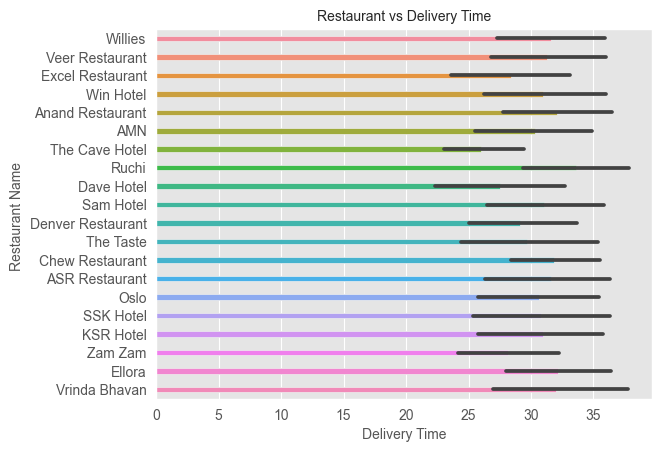

In [20]:
ax = sns.barplot(x="Delivery Time Taken (mins)", y='RestaurantName' ,data=OrdersDetails, width=0.3, saturation=0.9) 
ax.set_title('Restaurant vs Delivery Time',size=10) 
ax.set_ylabel('Restaurant Name ',size=10);
ax.set_xlabel('Delivery Time',size=10);

# Order Amount Of Each Restaurant


In [21]:
RestaurantSales = OrdersDetails.groupby(['RestaurantName'], as_index=True, sort=True).agg({'Order Amount': ['mean', max, min]})
RestaurantSales

Order Amount           
                          mean   max  min
RestaurantName                           
AMN                   587.5455  1165   11
ASR Restaurant        546.9130  1119   86
Anand Restaurant      641.0000  1198   50
Chew Restaurant       567.6129  1184   12
Dave Hotel            541.9000  1050   59
Denver Restaurant     693.3913  1193  167
Ellora                558.2188  1165   27
Excel Restaurant      517.4348   976   45
KSR Hotel             524.7917  1011    3
Oslo                  600.6522  1196   65
Ruchi                 488.3571  1047    6
SSK Hotel             605.3500  1155   40
Sam Hotel             696.0000  1115  102
The Cave Hotel        591.6875  1015   28
The Taste             721.2222  1160  124
Veer Restaurant       660.9655  1091   19
Vrinda Bhavan         610.7500  1169   20
Willies               610.8000  1068  124
Win Hotel             571.7778  1017  114
Zam Zam               664.8800  1178   29

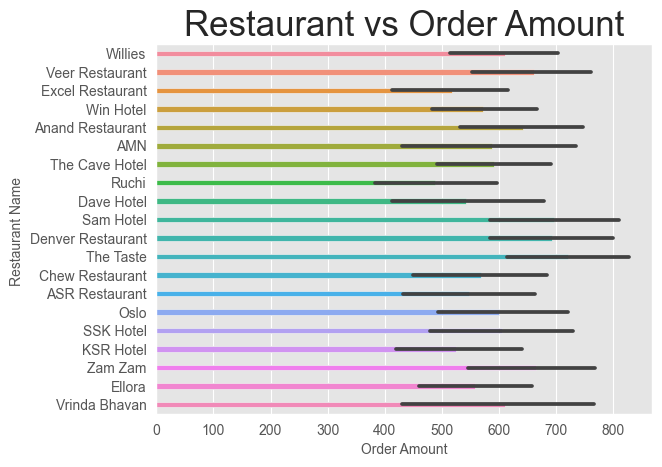

In [22]:
ax = sns.barplot(x="Order Amount", y='RestaurantName' ,data=OrdersDetails, width=0.3, saturation=0.9) 
ax.set_title('Restaurant vs Order Amount',size=25) 
ax.set_ylabel('Restaurant Name ',size=10);
ax.set_xlabel('Order Amount',size=10);

# Total Amount Of Each Restaurant

In [23]:
RestaurantTotalAmount = OrdersDetails.groupby(['RestaurantName'], as_index=False, sort=True).agg({'Order Amount': sum})

In [24]:
RestaurantTotalAmount

,RestaurantName,Order Amount
0,AMN,12926
1,ASR Restaurant,12579
2,Anand Restaurant,18589
3,Chew Restaurant,17596
4,Dave Hotel,10838
5,Denver Restaurant,15948
6,Ellora,17863
7,Excel Restaurant,11901
8,KSR Hotel,12595
9,Oslo,13815


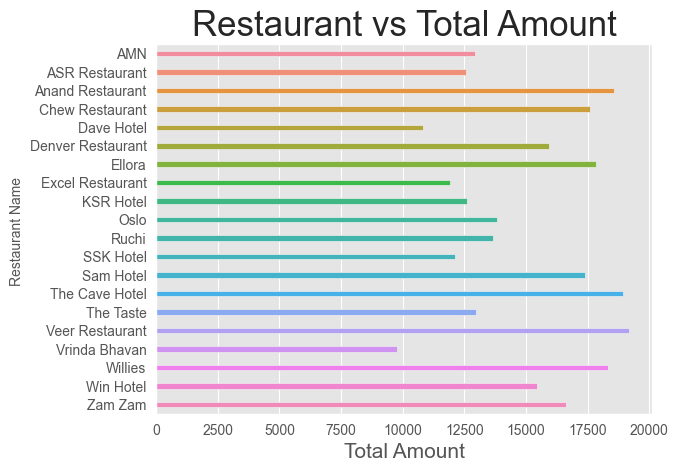

In [25]:
ax = sns.barplot(x="Order Amount", y='RestaurantName' ,data=RestaurantTotalAmount, width=0.3, saturation=0.9) 
ax.set_title('Restaurant vs Total Amount',size=25) 
ax.set_ylabel('Restaurant Name ',size=10);
ax.set_xlabel('Total Amount',size=15);

# Sales Quantity Of Each Restaurant

In [26]:
SalesQuantity = OrdersDetails.groupby(['RestaurantName'], as_index=True, sort=True).agg({'Quantity of Items': ['mean', max, min, sum]})
SalesQuantity

Quantity of Items             
                               mean max min  sum
RestaurantName                                  
AMN                          4.3182   7   1   95
ASR Restaurant               4.5217   7   2  104
Anand Restaurant             5.0345   7   1  146
Chew Restaurant              4.0645   7   1  126
Dave Hotel                   4.2500   7   1   85
Denver Restaurant            4.7826   6   3  110
Ellora                       4.8125   7   1  154
Excel Restaurant             4.4348   7   1  102
KSR Hotel                    4.2917   7   1  103
Oslo                         4.6957   7   1  108
Ruchi                        4.0000   7   1  112
SSK Hotel                    4.6000   7   1   92
Sam Hotel                    5.0800   7   1  127
The Cave Hotel               4.9062   7   1  157
The Taste                    5.0000   7   2   90
Veer Restaurant              5.0345   7   1  146
Vrinda Bhavan                5.1250   7   1   82
Willies                      4.8000   7   1  144
Win Hotel                    4.7037   7   1  127
Zam Zam                      4.6400   7   1  116

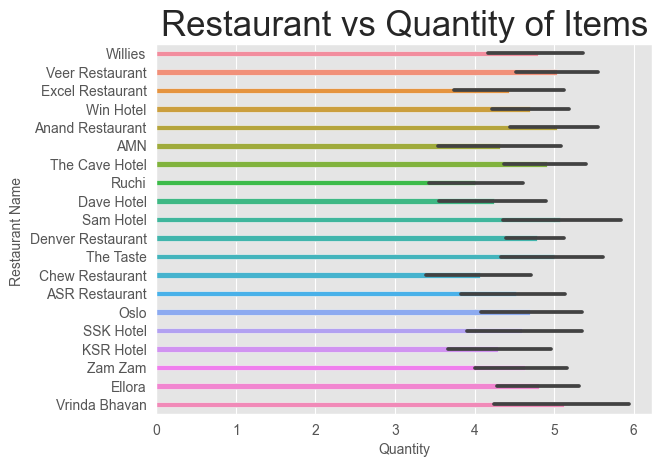

In [27]:
ax = sns.barplot(x="Quantity of Items", y='RestaurantName' ,data=OrdersDetails, width=0.3, saturation=0.9) 
ax.set_title('Restaurant vs Quantity of Items',size=25) 
ax.set_ylabel('Restaurant Name ',size=10);
ax.set_xlabel('Quantity',size=10);

# Count Of Each Types Of Payment Method For Each Restaurant

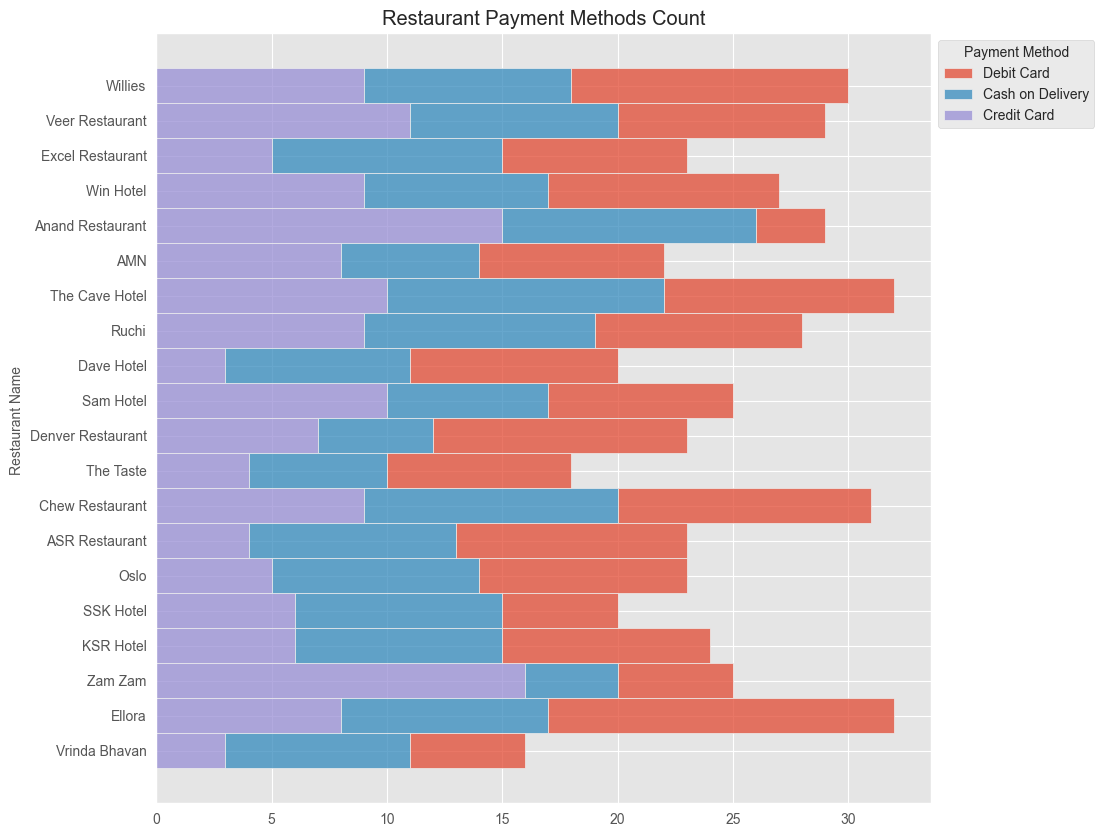

In [28]:
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.histplot(binwidth=0.2, y="RestaurantName", hue="Payment Method", data=OrdersDetails, stat="count", multiple="stack", ax=ax);
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_title('Restaurant Payment Methods Count')
ax.set_ylabel('Restaurant Name ',size=10);
ax.set_xlabel('',size=10);

# Rating Of Each Cuisine

In [29]:
CuisineRating= OrdersDetails.groupby(['Cuisine'], as_index=False, sort=True).agg({'Customer Rating-Delivery': ['mean', max, min], 'Customer Rating-Food': ['mean', max, min]})

In [30]:
CuisineRating

Cuisine Customer Rating-Delivery         Customer Rating-Food        
                                    mean max min                 mean max min
0       African                   3.0820   5   1               3.4590   5   1
1       Arabian                   3.0800   5   1               3.4400   5   1
2       Belgian                   2.6429   5   1               3.2500   5   1
3       Chinese                   2.8519   5   1               3.3086   5   1
4   Continental                   3.0727   5   1               3.3818   5   1
5        French                   2.9577   5   1               3.2676   5   1
6  North Indian                   3.0000   5   1               3.5926   5   1
7  South Indian                   3.2857   5   1               3.2143   5   1

# Delivery Time Taken For Each Cuisine

In [31]:
CuisineDelivery = OrdersDetails.groupby(['Cuisine'], as_index=True, sort=True).agg({'Delivery Time Taken (mins)': ['mean', max, min]})
CuisineDelivery

Delivery Time Taken (mins)        
                                   mean max min
Cuisine                                        
African                         32.1311  50  10
Arabian                         28.2000  46  12
Belgian                         31.4821  49  10
Chinese                         32.0000  50  10
Continental                     27.3273  47  10
French                          30.8169  50  11
North Indian                    30.2222  50  10
South Indian                    30.1714  50  10

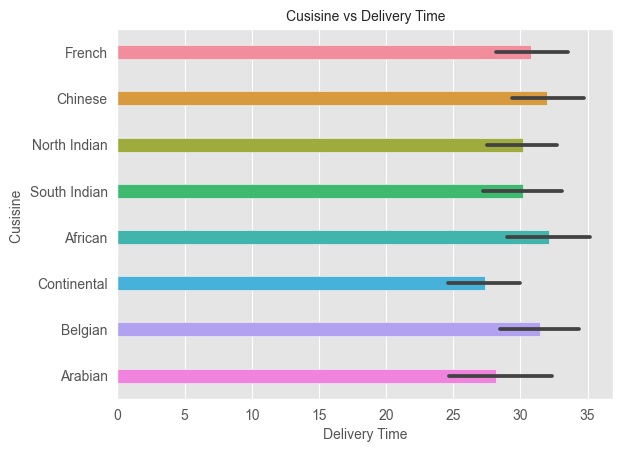

In [32]:
ax = sns.barplot(x="Delivery Time Taken (mins)", y='Cuisine' ,data=OrdersDetails, width=0.3, saturation=0.9) 
ax.set_title('Cusisine vs Delivery Time',size=10) 
ax.set_ylabel('Cusisine ',size=10);
ax.set_xlabel('Delivery Time',size=10);

# Order Amount Of Each Cuisine


In [33]:
CuisineSales = OrdersDetails.groupby(['Cuisine'], as_index=True, sort=True).agg({'Order Amount': ['mean', max, min]})
CuisineSales

Order Amount          
                     mean   max min
Cuisine                            
African          597.5738  1198  27
Arabian          664.8800  1178  29
Belgian          624.9286  1184  12
Chinese          560.9506  1091   3
Continental      634.2182  1193  28
French           635.5070  1196  65
North Indian     576.6173  1169  11
South Indian     555.0714  1119  59

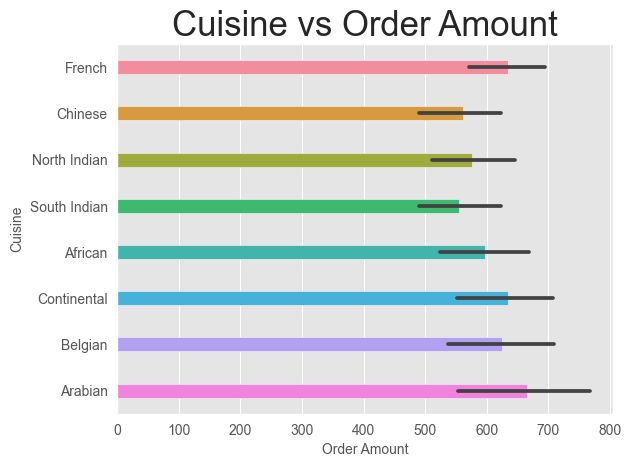

In [34]:
ax = sns.barplot(x="Order Amount", y='Cuisine' ,data=OrdersDetails, width=0.3, saturation=0.9) 
ax.set_title('Cuisine vs Order Amount',size=25) 
ax.set_ylabel('Cuisine',size=10);
ax.set_xlabel('Order Amount',size=10);

# Total Amount Of Each Cuisine

In [35]:
CuisineTotalAmount = OrdersDetails.groupby(['Cuisine'], as_index=False, sort=True).agg({'Order Amount': sum})

In [36]:
CuisineTotalAmount

,Cuisine,Order Amount
0,African,36452
1,Arabian,16622
2,Belgian,34996
3,Chinese,45437
4,Continental,34882
5,French,45121
6,North Indian,46706
7,South Indian,38855


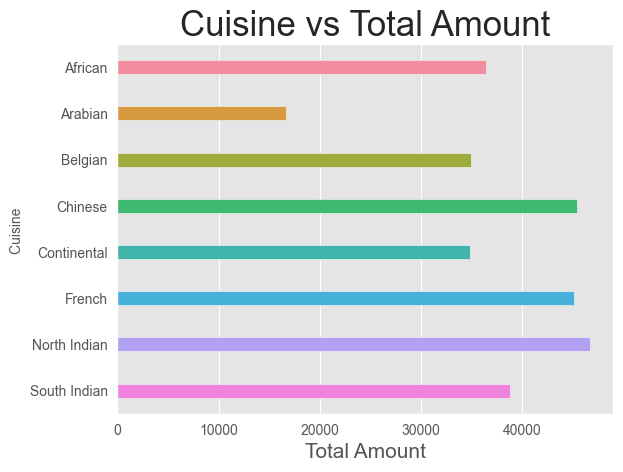

In [37]:
ax = sns.barplot(x="Order Amount", y='Cuisine' ,data=CuisineTotalAmount, width=0.3, saturation=0.9) 
ax.set_title('Cuisine vs Total Amount',size=25) 
ax.set_ylabel('Cuisine ',size=10);
ax.set_xlabel('Total Amount',size=15);

# Sales Quantity Of Each Cuisine

In [38]:
CuisineSalesQuantity = OrdersDetails.groupby(['Cuisine'], as_index=True, sort=True).agg({'Quantity of Items': ['mean', max, min, sum]})
CuisineSalesQuantity

Quantity of Items             
                          mean max min  sum
Cuisine                                    
African                 4.9180   7   1  300
Arabian                 4.6400   7   1  116
Belgian                 4.5179   7   1  253
Chinese                 4.4568   7   1  361
Continental             4.8545   7   1  267
French                  4.8169   7   1  342
North Indian            4.5802   7   1  371
South Indian            4.5143   7   1  316

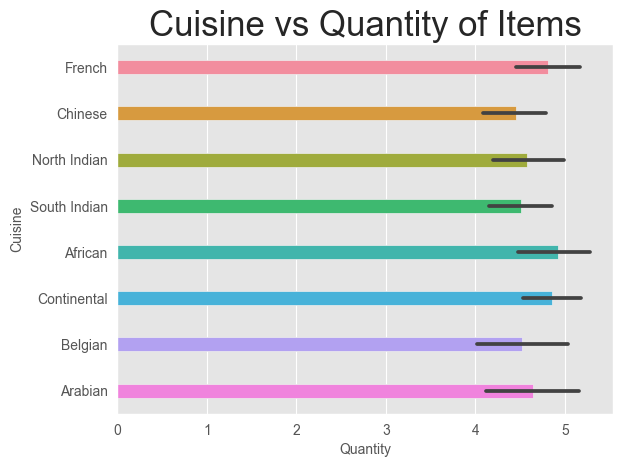

In [39]:
ax = sns.barplot(x="Quantity of Items", y='Cuisine' ,data=OrdersDetails, width=0.3, saturation=0.9) 
ax.set_title('Cuisine vs Quantity of Items',size=25) 
ax.set_ylabel('Cuisine',size=10);
ax.set_xlabel('Quantity',size=10);

# Count Of Each Types Of Payment Method For Each Cuisine

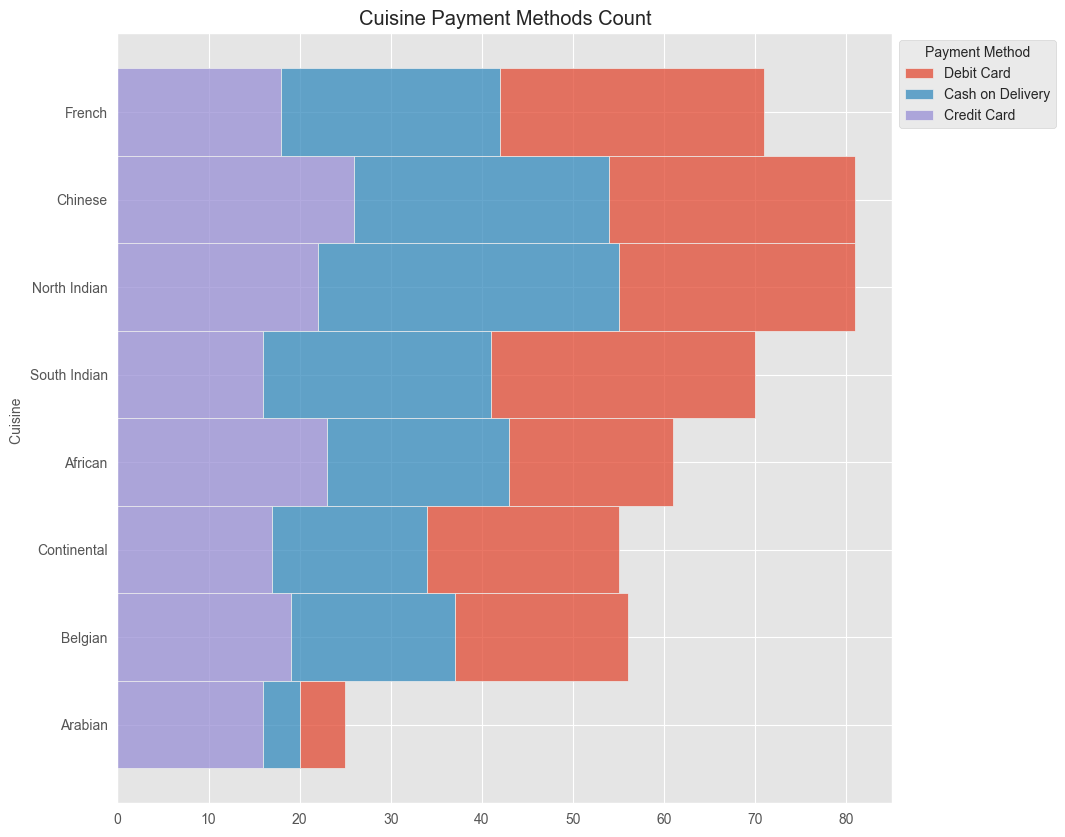

In [40]:
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.histplot(binwidth=0.2, y="Cuisine", hue="Payment Method", data=OrdersDetails, stat="count", multiple="stack", ax=ax);
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_title('Cuisine Payment Methods Count')
ax.set_ylabel('Cuisine ',size=10);
ax.set_xlabel('',size=10);

# Pie Chart For Percentage Of Each Paymnet Methods 

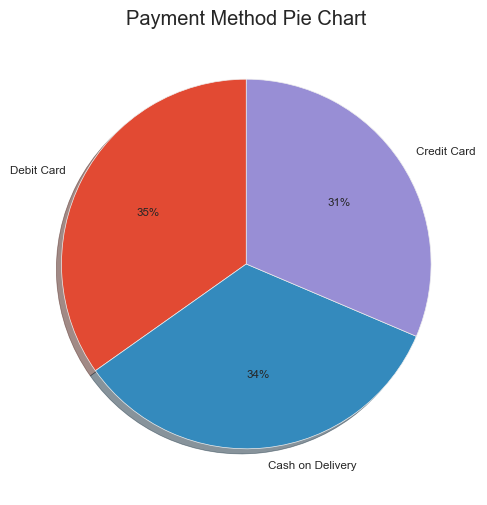

In [41]:
OrdersDetails['Payment Method'].value_counts().plot.pie(autopct = '%0.0f%%',
                                    textprops={'size':'small'},
                                    title = "Payment Method Pie Chart",
                                    figsize = (6,6),
                                    shadow=True, 
                                    startangle=90,);
plt.ylabel('');

# Pie Chart For Percentage Of Each Cuisine

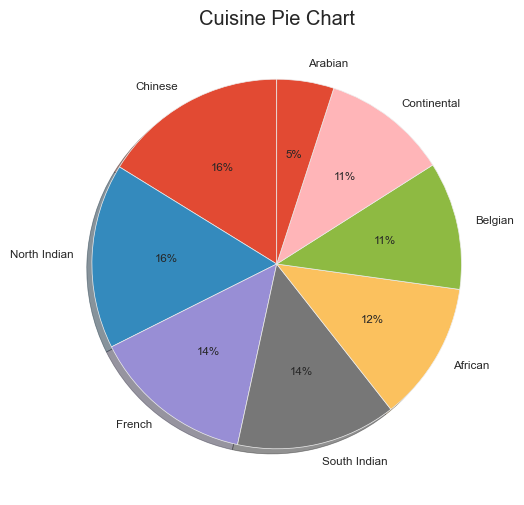

In [42]:
OrdersDetails['Cuisine'].value_counts().plot.pie(autopct = '%0.0f%%',
                                    textprops={'size':'small'},
                                    title = "Cuisine Pie Chart",
                                    figsize = (6,6),
                                    shadow=True, 
                                    startangle=90,);
plt.ylabel('');

# Pie Chart For Percentage Of Food Rating

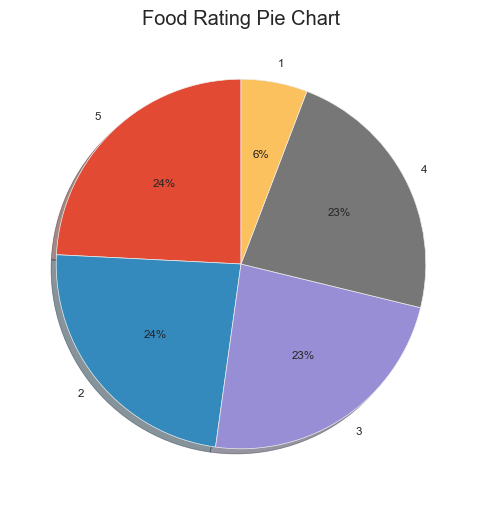

In [43]:
OrdersDetails['Customer Rating-Food'].value_counts().plot.pie(autopct = '%0.0f%%',
                                    textprops={'size':'small'},
                                    title = "Food Rating Pie Chart",
                                    figsize = (6,6),
                                    shadow=True, 
                                    startangle=90,);
plt.ylabel('');

# Pie Chart For Percentage Of Each Delivery Rating

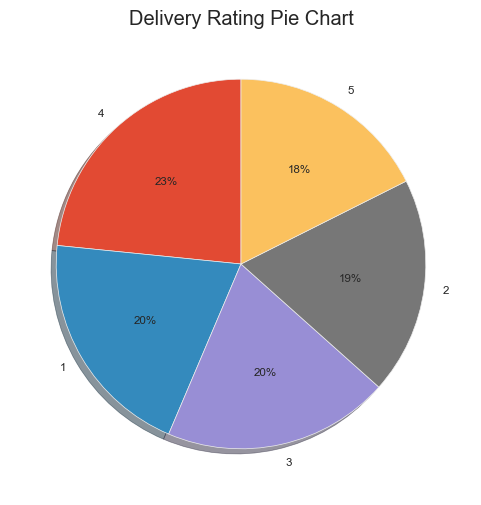

In [44]:
OrdersDetails['Customer Rating-Delivery'].value_counts().plot.pie(autopct = '%0.0f%%',
                                    textprops={'size':'small'},
                                    title = "Delivery Rating Pie Chart",
                                    figsize = (6,6),
                                    shadow=True, 
                                    startangle=90,);
plt.ylabel('');

# Count Of Each Paymnet Methods 

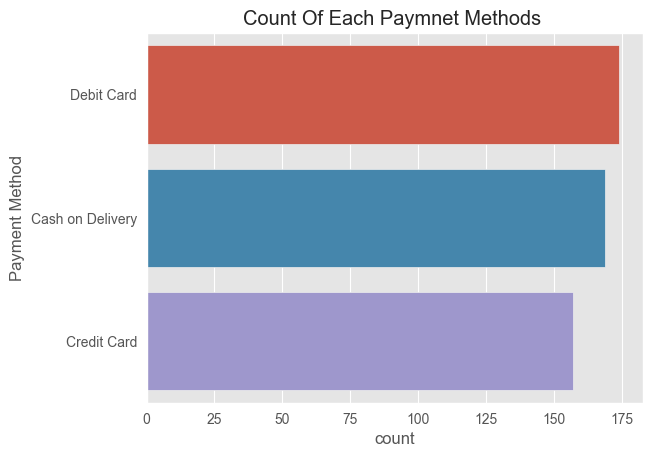

In [45]:
sns.countplot(y=OrdersDetails['Payment Method']).set(title='Count Of Each Paymnet Methods ');

# Count Of Each Cuisine 

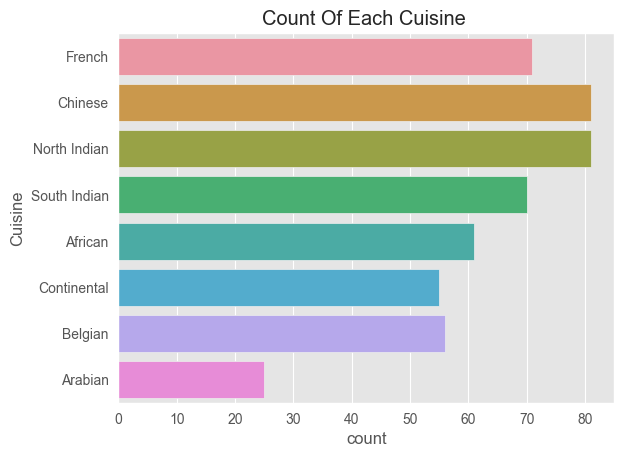

In [46]:
sns.countplot(y=OrdersDetails['Cuisine']).set(title='Count Of Each Cuisine ');

# Count Of Food Rating 

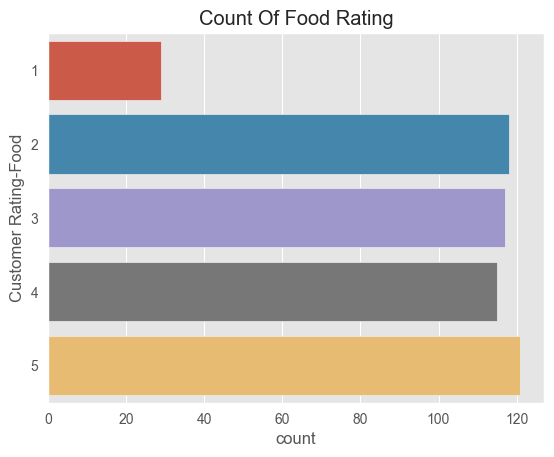

In [47]:
sns.countplot(y=OrdersDetails['Customer Rating-Food']).set(title='Count Of Food Rating');

# Count Of Delivery Rating

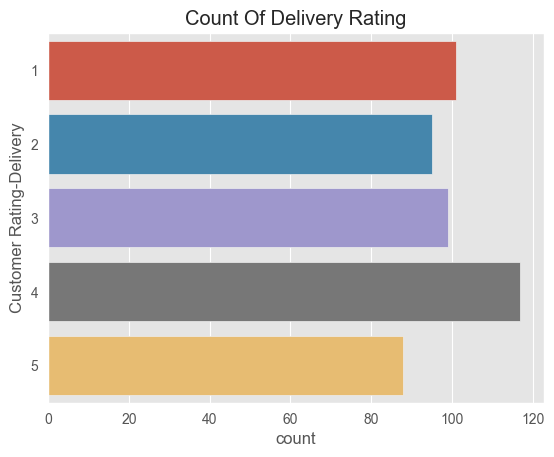

In [48]:
sns.countplot(y=OrdersDetails['Customer Rating-Delivery']).set(title='Count Of Delivery Rating');